## HELLO, ENTANGLED WORLD!

As an example of how we can work with two qubits in Qiskit, we are going to implement a circuit that prepares an entangled state (a Bell pair)

C:\Users\Acer\.conda\envs\name_of_my_env\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Acer\.conda\envs\name_of_my_env\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\Users\Acer\.conda\envs\name_of_my_env\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:\n%s" %


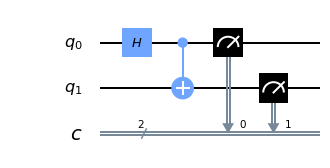

In [1]:
%matplotlib inline

from qiskit import *
from qiskit.visualization import *
from qiskit.tools.monitor import *

circ_bell = QuantumCircuit(2,2) # We need two qubits and two classical bits (for the measurements)

circ_bell.h(0) # We apply the H gate on the first qubit
circ_bell.cx(0,1) # We apply the CNOT gate with control on the first qubit and target on the second
circ_bell.measure(range(2),range(2)) # Measurement

circ_bell.draw(output='mpl')

We execute the circuit 1000 times and print the results

In [2]:
backend = Aer.get_backend('qasm_simulator')
job = execute(circ_bell, backend, shots=1000)

counts = job.result().get_counts()

print(counts)

{'00': 496, '11': 504}


Now, we are going to directly access the amplitudes and probabilities of the states. For that, we need to remove the measurement and use the statevector simulator

In [4]:
circ_bell2 = QuantumCircuit(2)
circ_bell2.h(0) 
circ_bell2.cx(0,1) 

backend = Aer.get_backend('statevector_simulator')
job = execute(circ_bell2, backend)

state = job.result().get_statevector()

for i in range(4):
    s = format(i,"b") # Convert to binary
    s = (2-len(s))*"0"+s # Prepend zeroes if needed
    print("Amplitude of",s,"=",state[i])
    
print()

for i in range(4):
    s = format(i,"b") # Convert to binary
    s = (2-len(s))*"0"+s # Prepend zeroes if needed
    print("Probability of",s,"=",abs(state[i])**2)


Amplitude of 00 = (0.7071067811865476+0j)
Amplitude of 01 = 0j
Amplitude of 10 = 0j
Amplitude of 11 = (0.7071067811865476+0j)

Probability of 00 = 0.5000000000000001
Probability of 01 = 0.0
Probability of 10 = 0.0
Probability of 11 = 0.5000000000000001


We are going to run the circuit on an actual computer. To reduce the wait, we would like to execute on the computer with the fewest pending jobs. We can check their properties, after loading our account, with the order *backend_overview()*

In [8]:
provider = IBMQ.load_account()
backend_overview()

ibmqfactory.load_account:WARNING:2020-11-14 02:33:08,261: Credentials are already in use. The existing account in the session will be replaced.
accountprovider._discover_remote_backends:WARNING:2020-11-14 02:33:12,919: Remote backend "ibmq_qasm_simulator" could not be instantiated due to an invalid config: ModelValidationError: "{'online_date': ['Not a valid datetime.']}"
accountprovider._discover_remote_backends:WARNING:2020-11-14 02:33:12,921: Remote backend "ibmqx2" could not be instantiated due to an invalid config: ModelValidationError: "{'online_date': ['Not a valid datetime.']}"
accountprovider._discover_remote_backends:WARNING:2020-11-14 02:33:12,923: Remote backend "ibmq_16_melbourne" could not be instantiated due to an invalid config: ModelValidationError: "{'online_date': ['Not a valid datetime.']}"
accountprovider._discover_remote_backends:WARNING:2020-11-14 02:33:12,925: Remote backend "ibmq_vigo" could not be instantiated due to an invalid config: ModelValidationError: "{

QiskitError: 'No backends available.'

We can also access more details of a particular computer with the following command

In [9]:
backend_monitor(provider.get_backend("ibmq_ourense"))

QiskitBackendNotFoundError: 'No backend matches the criteria'

We are going to select the least busy device and run our circuit on it

In [ ]:
from qiskit.providers.ibmq import least_busy

# We execute on the least busy device (among the actual quantum computers)
backend = least_busy(provider.backends(operational = True, simulator=False, status_msg='active',
                                       filters=lambda x: x.configuration().n_qubits > 1)) 
print("We are executing on...",backend)
print("It has",backend.status().pending_jobs,"pending jobs")
job_exp = execute(circ_bell, backend=backend)
job_monitor(job_exp)

Once that we have run the job, we draw the results and compare them to the one obtained by the simulator

In [ ]:
result_exp = job_exp.result()
counts_exp = result_exp.get_counts(circ_bell)
plot_histogram([counts_exp,counts], legend=['Device', 'Simulator'])